<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="https://github.com/yasmineelaoufir/projet4a" ><img src="https://dyw7ncnq1en5l.cloudfront.net/optim/news/75/75755/-c-github.jpg" style="max-width: 250px; display: inline"  alt="Github"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>


# Incentive policies to reduce carbon emissions

Team : Martin DUBOST |
Elyasmine ELAOUFIR |
Nusaïbah IBRAHIMI |
<br>
Supervisors : Jessica MARTIN | Anthony REVEILLAC 

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
import os
import matplotlib.pyplot as plt
import scipy.stats as st 
from scipy.stats import norm
import math

#K coup de l'effort 
#B a comparer au x la même chose
#resultat ; incitation forte salaire fort discussion la meilleurs des cas politique incitations
#Valeur sans contract penalité 0 : état actuel sans rien. (0,0,0)
#valeur agent Ua Y

# Plan du notebook : 

1 optimisation of a per penalty + graphs
2 optimisation of p et s per penalty + graphs

3 choix des parametres
4 resultats finaux


In this notebook, we have compute the objective functions in their standard form, hence we study the opposite function (to minimize).

 # 1) Optimization of the company's problem : $a$ 

 ## 1.1) First penalty $P(x)=p \, (x-B) , \quad p\in (0,1)$ :

We have an explicit expression of the optimal action $a^*$ (see the scientific article).


In [141]:
def f1_a (a,x0,p,k):
    return p*x0/k

 ## 1.2) Second penalty  $P(x)=p \mathbb{1}_{x \geq B }, \quad p\in\mathbb{R}^*_+ $:

In [142]:
# function of the company's problem :
def f2_a (a,s,gA,B,x0,p,k):
    return np.exp(-gA*(s-k*a**2/2))*(np.exp(gA*p)*(1-norm.cdf(B/x0+a,0,1))+norm.cdf(B/x0+a,0,1))


In [143]:
#Graph of the company's problem 
#Computation of the minimum f2_a and the point of the minimum a


def plotf2(x,s,gA,B,x0,p,k): # x is the vector of a


    y=np.zeros(len(x))      # y is the vector of f2_a()
    y = f2_a(x,s,gA,B,x0,p,k)
    plt.plot(x,np.log(y))

    xlabel('a')
    ylabel("company's problem")
    title("Representation of the company's problem : optimization of the action $a$")

    
    
    # we change the color of the minimum in red
    plt.scatter([x[np.argmin(y)]],[np.log(f2_a(x[np.argmin(y)],s,gA,B,x0,p,k))],c = "red")
    show()   
    
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", k)
    print("p =", p)
    
    print('Minimum of the problem =' ,y[np.argmin(y)] )
    print('The point of minimum a is ' ,x[np.argmin(y)] )
    
    
    
    
    # we plot the optimal action $a^*$ depending the penalty $p$
    # the parameters k and B are fixed
    taille = 10
    a_star=[]
    p=[]
    for pt in range(taille):
        x=np.linspace(0,20,1000)
        y = f2_a(x,s,gA,B,x0,pt,k)
        p.append(pt)
        a_star.append(x[np.argmin(y)])

    plt.plot(p,a_star)
    xlabel('penalty p')
    ylabel('Optimal action a*')
    title('Optimization of the action in function of the penalty')
    show()
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", k)

In [144]:
x=np.linspace(0,4,1000) 

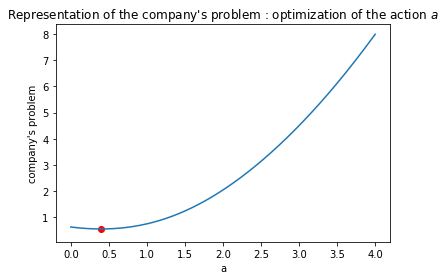

This simulations is for those values :
B = 0
k = 1
p = 1
Minimum of the problem = 1.7246778765381183
The point of minimum a is  0.3963963963963964


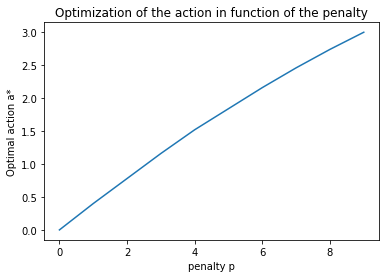

This simulations is for those values :
B = 0
k = 1


In [145]:
# we fixed these parameters arbitrarly

s=0
gA=1
B=0
x0=1
p=1
k=1

plotf2(x,s,gA,B,x0,p,k)

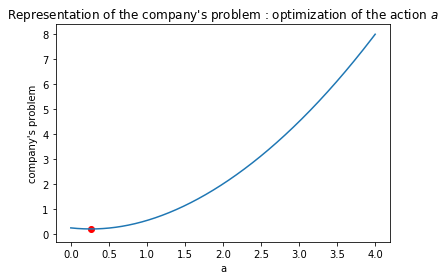

This simulations is for those values :
B = 1
k = 1
p = 1
Minimum of the problem = 1.2189269077183364
The point of minimum a is  0.26426426426426425


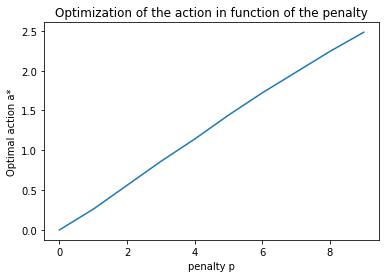

This simulations is for those values :
B = 1
k = 1


In [146]:
# with others parameters
s=0
gA=1
B=1      # B has changed
x0=1
p=1
k=1

plotf2(x,s,gA,B,x0,p,k)

 ## 1.3) Third penalty  $P(x)=p  x \, \mathbb{1}_{x \geq B } , \quad p\in (0,1) $:

In [147]:
# function of the company's problem :
def f3_a (a,s,gA,B,x0,p,k):
    return np.exp(-gA*(s-k*a**2/2))*(norm.cdf(B/x0+a,0,1)+np.exp(-gA*p*x0*a+(gA*p*x0)**2/2)*(1-norm.cdf(B/x0+a,gA*p*x0,1)))

In [148]:
#Graph of the company's problem 
#Computation of the minimum f3_a and the point of the minimum a


def plotf3(x,s,gA,B,x0,p,k): #x the vector of value a 

    y=np.zeros(len(x))       # the value of f3_a()
    for i in range(0,len(x)):
        y[i]=f3_a(x[i],s,gA,B,x0,p,k)
    plt.plot(x,np.log(y))
    xlabel('a')
    ylabel("company's problem")

    np.argmin(y)
    a_star3=x[np.argmin(y)]

    
    # we change the color of the minimum in red
    plt.scatter(a_star3,np.log(y[np.argmin(y)]),c = "red")
    show()
    
    
    print('Minimum of the problem =' ,y[np.argmin(y)] )
    print('The point of minimum a is ' ,a_star3 )
    
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", k)
    print("p =", p)
    
    
    # we plot the optimal action $a^*$ depending the penalty $p$
    # the parameters k and B are fixed   
    taille = 10
    a_star=[]
    p=[]
    for pt in range(taille):
        x=np.linspace(0,20,1000)
        y = f3_a(x,s,gA,B,x0,pt,k)
        p.append(pt)
        a_star.append(x[np.argmin(y)])

    plt.plot(p,a_star)
    xlabel('penalty p')
    ylabel('Optimal action a*')
    title('Optimization of the action in function of the penalty')
    show()
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", k)

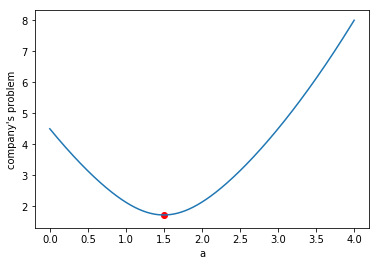

Minimum of the problem = 5.601605575149971
The point of minimum a is  1.4974974974974975
This simulations is for those values :
B = 0.5
k = 1
p = 3


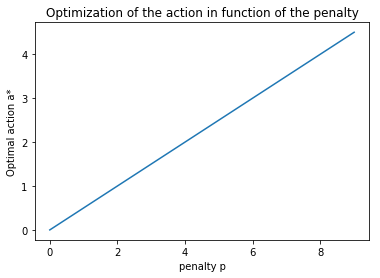

This simulations is for those values :
B = 0.5
k = 1


In [149]:
#fixed parameters
s=0
gA=1
B=0.5
x0=1
p=3
k=1

a3=np.linspace(0,5,1000)

plotf3(x,s,gA,B,x0,p,k)

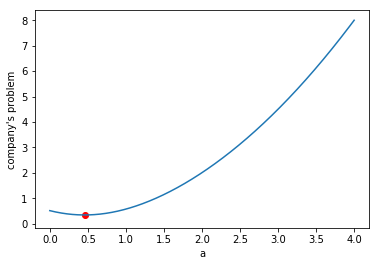

Minimum of the problem = 1.4048006852776573
The point of minimum a is  0.45645645645645644
This simulations is for those values :
B = 1
k = 1
p = 1


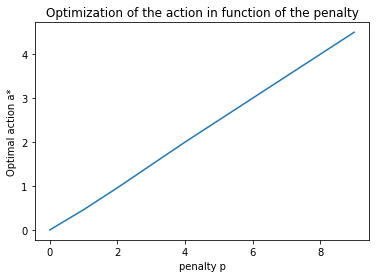

This simulations is for those values :
B = 1
k = 1


In [150]:
#other values of the parameters
s=0
gA=1
B=1
x0=1
p=1
k=1

a3=np.linspace(0,5,1000)

plotf3(x,s,gA,B,x0,p,k)

 ## 1.4) Fourth penalty  $P(x)=p \, (x-B)_{+} \,, \, p \in (0,1) $:

In [151]:
# function of the company's problem :
def f4_a (a,s,gA,B,x0,p,k):
    return np.exp(-gA*(s-k*a**2/2))*(exp(-gA*p*(x0*a+B-gA*p*x0**2/2))*(1-norm.cdf(B/x0+a-gA*p*x0,0,1))+norm.cdf(B/x0+a,0,1))

In [152]:
#Graph of the company's problem 
#Computation of the minimum f3_a and the point of the minimum a


def plotf4(x,s,gA,B,x0,p,k): #x the vector of value a  

    y=np.zeros(len(x))
    for i in range(0,len(x)):
        y[i]=f4_a(x[i],s,gA,B,x0,p,k)
    plt.plot(x,np.log(y))
    xlabel('a')
    ylabel('cost function')

    np.argmin(y)
    a_star4=x[np.argmin(y)]

    #we change the color of the minimum in red
    plt.scatter(a_star4,np.log(y[np.argmin(y)]),c = "red")
    show()
    
    print('Minimum of the problem =' ,y[np.argmin(y)] )
    print('The point of minimum a is ' ,a_star4 )
    
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", k)
    print("p =", p)
    
    
    # we plot the optimal action $a^*$ depending the penalty $p$
    # the parameters k and B are fixed  
    
    taille = 10
    cl=[]
    a=[]
    for pt in range(taille):
        x=np.linspace(0,20,1000)
        y = f4_a(x,s,gA,B,x0,pt,k)
        a.append(pt)
        cl.append(x[np.argmin(y)])

    plt.plot(a,cl)
    xlabel('penalty p')
    ylabel('Optimal action a*')
    title('Optimization of the action in function of the penalty')
    show()
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", k)

In [153]:
a4=np.linspace(0,10,1000)

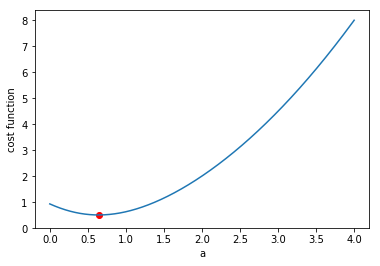

Minimum of the problem = 1.665122472766448
The point of minimum a is  0.6406406406406406
This simulations is for those values :
B = 1
k = 1
p = 0.9


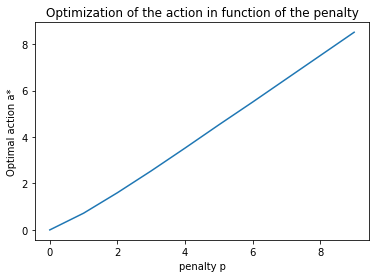

This simulations is for those values :
B = 1
k = 1


In [154]:
#fixed parameters (arbitrary choice)
s=0
gA=1
B=1
x0=2
p=0.9
k=1

plotf4(x,s,gA,B,x0,p,k)


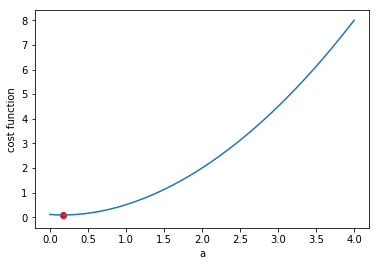

Minimum of the problem = 1.100669451484741
The point of minimum a is  0.17217217217217218
This simulations is for those values :
B = 1
k = 1
p = 0.9


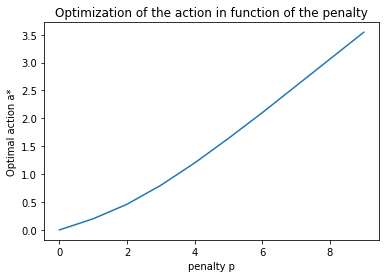

This simulations is for those values :
B = 1
k = 1


In [155]:
#other value of parameters
s=0
gA=1
B=1
x0=1
p=0.9
k=1

plotf4(x,s,gA,B,x0,p,k)

 # 2) Optimization of the government's problem : $p$ and $s$ 

## 2.1) First penalty

In [168]:
#Lagrangian

def f1_p(x0,K,p,s,B):
    return np.exp(-p*(x0**2)/K + (x0**2)/2) + ((p*x0)**2)/K + B*p + s

#Gradient of the Lagrangien 

def gradf_p(x0,K,p,s,B):
    return -np.exp(-p*(x0**2)/K + (x0**2)/2)*(x0**2)/K + 2*(p)*((x0)**2)/K + B
    

In [169]:
#Algorithme de descente de gradient statégie de cauchy à pas fixe

def descente (x0,K,p0,s,B,pas):
    iteration = 0
    p1 = p0 - pas*gradf(x0,K,p0,s,B)
    while f1_p(x0,K,p1,s,B) < f1_p(x0,K,p0,s,B):
        p0 = p1
        iteration += 1
        p1 = p0 - pas*gradf(x0,K,p0,s,B)
   
    return p0
    
    

In [170]:
K = 1
B = 0 #choix du B : comparable X1a pas trop grand, moyenne de la gaussienne on pénalise proportionnelement 
x0 = 3
pas = 0.001 
p0 = 0
s= 0
gradf(x,K,p0,s,B)


array([ 0.00000000e+00, -1.60321766e-05, -6.41302485e-05, -1.44298843e-04,
       -2.56545671e-04, -4.00881530e-04, -5.77320308e-04, -7.85878976e-04,
       -1.02657760e-03, -1.29943934e-03, -1.60449045e-03, -1.94176029e-03,
       -2.31128131e-03, -2.71308908e-03, -3.14722227e-03, -3.61372267e-03,
       -4.11263520e-03, -4.64400789e-03, -5.20789192e-03, -5.80434159e-03,
       -6.43341435e-03, -7.09517082e-03, -7.78967475e-03, -8.51699307e-03,
       -9.27719589e-03, -1.00703565e-02, -1.08965514e-02, -1.17558602e-02,
       -1.26483659e-02, -1.35741545e-02, -1.45333154e-02, -1.55259412e-02,
       -1.65521277e-02, -1.76119741e-02, -1.87055827e-02, -1.98330591e-02,
       -2.09945124e-02, -2.21900548e-02, -2.34198020e-02, -2.46838728e-02,
       -2.59823897e-02, -2.73154783e-02, -2.86832677e-02, -3.00858904e-02,
       -3.15234822e-02, -3.29961825e-02, -3.45041340e-02, -3.60474831e-02,
       -3.76263794e-02, -3.92409763e-02, -4.08914304e-02, -4.25779021e-02,
       -4.43005552e-02, -

In [171]:
descente (x0,K,p0,s,B,pas)

0.50000000591117

In [172]:
#On définit une fonction d'affichage du maximum p de la premiere pénalité
def plotf1(x0,K,s,B):
    pas = 0.001 #variables pour la fonction descente
    p0 = 0
    p = np.linspace(0,1,1000)
    plt.plot(p , f1_p(x0,K,p,s,B))
    xlabel('p')
    ylabel('f(p)')
    title('Fonction PPPP')
    pp = descente (x0,K,p0,s,B,pas) #calcul de p star
    plt.scatter(pp,f1_p(x0,K,pp,s,B),c = "red")
    show()
    
    print('The point of global minimum p* is :',descente (x0,K,p0,s,B,pas) )
    print('This simulations is for those values :')
    print("B =", B)
    print("k =", K)
    

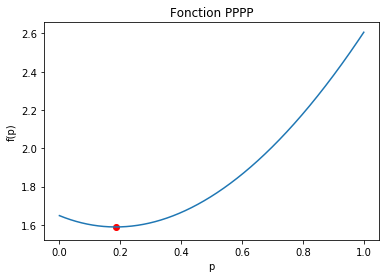

The point of global minimum p* is : 0.18507676493853129
This simulations is for those values :
B = 1
k = 1


In [177]:
K = 1
B = 1 #choix du B : comparable X1a pas trop grand, moyenne de la gaussienne on pénalise proportionnelement 
x0= 1

s= 0
plotf1(x0,K,s,B)

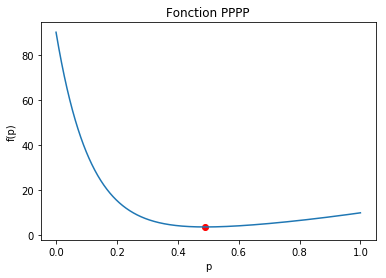

The point of global minimum p* is : 0.4902588087550816
This simulations is for those values :
B = 1
k = 1


In [178]:
K = 1
B = 1 #choix du B : comparable X1a pas trop grand, moyenne de la gaussienne on pénalise proportionnelement 
x0 = 3
pas = 0.001 
p0 = 0
s= 0
plotf1(x0,K,s,B)

In [181]:
#compute the salary s such as the participation constrainte is saturated
def f1_s(k,a,p,x0,B,gA,y):
    return (k*a**2)/2-p*x0*a-p*B+gA*(p*x0)**2/2+y

In [182]:
gA = 0
x0 = 1
B = 1
y=0
a_star1=descente (x,K,p0,s,B,pas)
p_star1=descente (x,K,p0,s,B,pas)
print('The optimal penalty p* is', p_star1)

print('The optimal action a* is', a_star1)




The optimal penalty p* is 0.18507676493853129
The optimal action a* is 0.18507676493853129


In [183]:
s_star1=f1_s(1,a_star1,p_star1,x0,B,gA,y)
print('The optimal wage s* is',s_star1 )

The optimal wage s* is -0.20220346939858747


We have implemented a non specific code such as any function can be used. From now, to optimize the penalty, we call the code below.

In [184]:
#Definition of the explained function


#choice of the parameter "function"
#f2_p  = 2    refers to the second tax
#f3_p  = 3    refers to the third tax
#f4_p  = 4    refers to the fourth tax



# this function illustrates the objective function depending on the penalty p
def optip(s,gA,B,x0,k,taille,function,gP=0): 
    p = np.linspace(0,1,taille)
    
    a_star = []
    for i in (p): #first, we compute the optimal action a* (a_star) for each penalty p
                                           
        a = np.linspace(0,10,taille)
        
      
        if function == 2:              
            
            y = f2_a(a,s,gA,B,x0,i,k)
            
        if function == 3:
            
            y = f3_a(a,s,gA,B,x0,i,k)
            
        if function == 4:
            
            y=f4_a(a,s,gA,B,x0,i,k)
            
        if function == 5:      #Function of the third penalty's non neutral utility
            y = f3_a(a,s,gA,B,x0,i,k)
        
            
        a_star.append(a[np.argmin(y)])
        

    value = []          # optimization of the penalty p knowing the value of the optimal action a_star
    for i in range(taille):
        
       
        if function == 2:
            
            y=f2_p(a_star[i],s,gA,B,x0,p[i],k)                                               
            value.append(y)
            
        if function == 3:
            
            y=f3_p(a_star[i],s,gA,B,x0,p[i],k)                                               
            value.append(y)
            
        if function == 4:
            
            y=f4_p(a_star[i],s,gA,B,x0,p[i],k)                                               
            value.append(y)
        if function == 5:      #Function of the third penalty's non neutral utility
            
            y=f3_p_ut(a_star[i],s,gA,B,x0,p[i],k,gP)                                               
            value.append(y)       
        

    min_value = np.min(value)         # the minimum value of the principal's problem
    print('Minimum of the problem =' ,min_value )
    print('The point of minimum p* is ' ,p[np.argmin(value)])     # value of the optimal penalty p* (p_star)
    plt.plot(p,value)                        
    xlabel('penalty p')
    ylabel("principal's problem")
    title("Representation of the principal's problem  : optimization of the penalty p")

    plt.show()
    p_star=p[np.argmin(value)]
    a_star=a_star[np.argmin(value)]
   
   

In [185]:
# this function compute the penalty p* and the action a*
def opti_value(s,gA,B,x0,k,taille,function,gP=0): 
    p = np.linspace(0,1,taille)
    
    a_star = []
    for i in (p): #first, we compute the optimal action a* (a_star) for each penalty p
        a = np.linspace(0,10,1000)
        
        if function == 2:
            
            y = f2_a(a,s,gA,B,x0,i,k)
            
        if function == 3:
            
            y = f3_a(a,s,gA,B,x0,i,k)
            
        if function == 4:
            
            y=f4_a(a,s,gA,B,x0,i,k)
            
        if function == 5:      #Function of the third penalty's non neutral utility
            y = f3_a(a,s,gA,B,x0,i,k)
            
            
            
        a_star.append(a[np.argmin(y)])
        
        
        

    value = [] #optimization of the penalty p knowing the value of the optimal action a_star
    for i in range(taille):
                    
        if function == 2:
            
            y=f2_p(a_star[i],s,gA,B,x0,p[i],k)                                               
            value.append(y)
            
        if function == 3:
            
            y=f3_p(a_star[i],s,gA,B,x0,p[i],k)                                               
            value.append(y)
            
        if function == 4:
            
            y=f4_p(a_star[i],s,gA,B,x0,p[i],k)                                               
            value.append(y)
        
        if function == 5:      #Function of the third penalty's non neutral utility
            
            y=f3_p_ut(a_star[i],s,gA,B,x0,p[i],k,gP)                                               
            value.append(y)
                                                  

    p_star = p[np.argmin(value)]
    a_star=a_star[np.argmin(value)]
    

    return p_star, a_star

#### Initialization of general parameters
Here are the parameters that will be used from now on. 

In [186]:
s=0
gA=1
x0=1
k=1
B =1
taille = 1000
taille1 = taille
taille2 = 12

## 2.2) Second penalty

To compare with the other taxes, we restrict the interval of $p$ in (0,1)

In [187]:
# function of the company's problem :
#optimization of the penalty p*
def f2_p (a,s,gA,B,x0,p,k):
    return np.exp(-x0*a + x0**2/2)+ s - p *(1-norm.cdf(B/x0+a,0,1))

#optimization of the salary s*
def f2_s (a,s,gA,B,x0,p,k):
    return y + k*a**2/2 + (1/gA)*math.log( (1-norm.cdf(B/x0+a,0,1))*np.exp((gA*p)**2/2)+norm.cdf(B/x0+a,0,1))


Minimum of the problem = 1.167130592365101
The point of minimum p* is  1.0


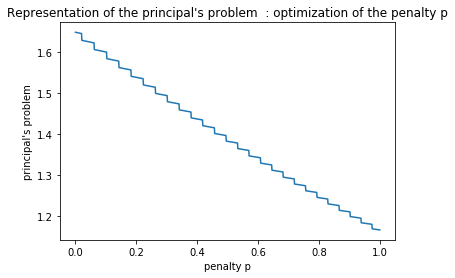

The value of the optimal penalty p* is  1.0
The value of the optimal action a* is  0.2602602602602603


In [188]:
#Application
optip(s,gA,B,x0,k,taille,function=2)
plt.show()

p_star2,a_star2 = opti_value(s,gA,B,x0,k,taille,function=2)
print("The value of the optimal penalty p* is ", p_star2)
print("The value of the optimal action a* is ", a_star2)

In [189]:
def f2_s(k,a,p,x0,B,gA,y):
    return y+(k*a**2)/2+(1/gA)*math.log(norm.cdf(B/x0+a)+(1-norm.cdf(B/x0+a))*np.exp(gA*p))

In [190]:
s_star2=f2_s(1,a_star2,p_star2,1,1,1,0)
print('The value of the optimal wage s* is ',s_star2 )

The value of the optimal wage s* is  0.1979714818495935


## 2.3) Third penalty

In [191]:
# function of the company's problem :
#optimization of the penalty p*
def f3_p (a,s,gA,B,x0,p,k):
    return np.exp(-x0*a + x0**2/2)+s+p*x0*a*(1-norm.cdf(B/x0+a,0,1))-p*x0*(1/np.sqrt(2*math.pi))*np.exp(-0.5*(B/x0+a)**2)


#optimization of the wage s*
def f3_s (a,s,gA,B,x0,p,k,Y):
    return Y+k*a**2/2 - (1/gA)*math.log ( norm.cdf(B/x0+a,0,1) + (1- norm.cdf(B/x0+a-gA*p*x0,0,1))*np.exp(-gA*p*x0*a+(gA*p*x0)**2/2))

Minimum of the problem = 0.9361982690164168
The point of minimum p* is  1.0


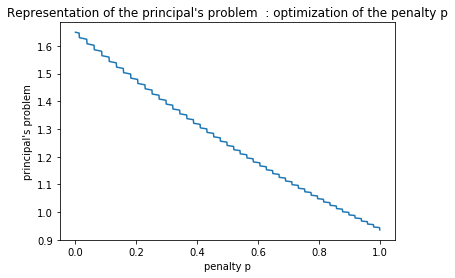

The value of the optimal penalty p* is  1.0
The value of the optimal action a* is  0.46046046046046046


In [192]:
#Application
optip(s,gA,B,x0,k,taille,function=3)
plt.show()

p_star3,a_star3=opti_value(s,gA,B,x0,k,taille,function=3)

print("The value of the optimal penalty p* is ", p_star3)
print("The value of the optimal action a* is ", a_star3)

In [193]:
def f3_s(k,a,p,x0,B,gA,y):
    return y+(k*a**2)/2+(1/gA)*math.log(norm.cdf(B/x0+a)+(1-norm.cdf(B/x0+a-gA*p*x0))*np.exp(-gA*p*x0*(a-gA*p*x0/2)))

In [194]:
s_star3=f3_s(1,a_star3,p_star3,1,1,1,0)
print('The value of the optimal wage s* is',s_star3 )

The value of the optimal wage s* is 0.339914808699065


## 2.4) Fourth penalty

In [195]:
# function of the company's problem :
#optimization of the penalty p*
def f4_p (a,s,gA,B,x0,p,k):
    return np.exp(-x0*a + x0**2/2)+s-p*(x0*(1/np.sqrt(2*math.pi))*np.exp(-0.5*(B/x0+a)**2) -(x0*a+B)*(1-norm.cdf(B/x0+a,0,1)))


#optimization of the wage s*
def f4_s (a,s,gA,B,x0,p,k,Y):
    return Y+k*a**2/2 + (1/gA)*math.log ( norm.cdf(B/x0+a,0,1) + (1- norm.cdf(B/x0+a-gA*p*x0,0,1))*np.exp(-gA*p*x0*a+(gA*p*x0)**2/2))


Minimum of the problem = 1.305925186223204
The point of minimum p* is  1.0


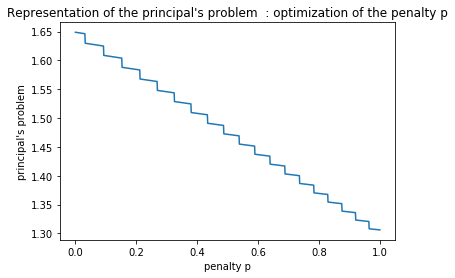

The value of the optimal penalty p* is  1.0
The value of the optimal action a* is  0.19019019019019018


In [196]:
#Application
optip(s,gA,B,x0,k,taille,function=4)
plt.show()


p_star4,a_star4 = opti_value(s,gA,B,x0,k,taille,function=4)

print("The value of the optimal penalty p* is ", p_star4)
print("The value of the optimal action a* is ", a_star4)

In [197]:
def f4_s(k,a,p,x0,B,gA,y):
    return y+(k*a**2)/2+(1/gA)*math.log(norm.cdf(B/x0+a)+(1-norm.cdf(B/x0+a-gA*p*x0))*np.exp(-gA*p*(x0*a+B-gA*p*x0**2/2)))

In [198]:
s_star4=f4_s(1,a_star4,p_star4,1,1,1,0)
print('The value of the optimal wage s* is',s_star4 )

The value of the optimal wage s* is 0.10969209003436277


# 3) Effect of the parameters

In [199]:
def B_effect(s,gA,x0,k,taille1,function,taille2):
    P=np.zeros(taille2)
    for i in range(taille2):
        B = i
        P[i]=opti_value(s,gA,B,x0,k,taille1,function)[0]
    return P
    
    

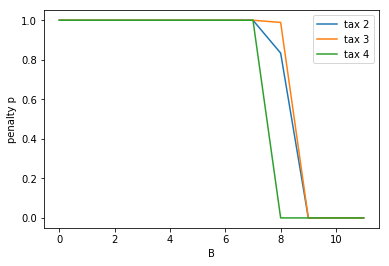

In [201]:
#effect on the B
plt.figure()
plt.plot(B_effect(s,gA,x0,k,taille1,2,taille2),label='tax 2')

plt.plot(B_effect(s,gA,x0,k,taille1,3,taille2),label='tax 3')

plt.plot(B_effect(s,gA,x0,k,taille1,4,taille2),label='tax 4')
xlabel("B")
ylabel("penalty p")
plt.legend()
#plt.show()

The government has more increasing difficulty as B becomes larger. 

In [202]:
def gA_effect(s,B,x0,k,taille1,function,taille2):
    P=np.zeros(taille2)
    for i in range(taille2):
        gA = i
        P[i]=optip(s,gA,B,x0,k,taille1,function)
    plt.plot(P)

# 4) Results
For each tax, we compute the value of the company's problem and of the government's problem. The carbon emissions at time $t$=1 is computed.


In [203]:

# function returns the carbon emission at time 0 and at time t=1 (after the actions taken by the company)
def emission (a_star,x0):
    
    return np.exp(x0), np.exp(-x0*a_star + (x0**2)/2)

Therfore, we compute these values when the company does nothing (action $a$=0), the government does not pay (salary $s$=0) and does not penalize (penalty $p$=0)

## 4.1) First penalty

In [204]:
# value of agent problem
def agent_pb1(a,p,s,gA,x0,B,k):
    return -np.exp(-gA*(s-k*a**2/2+p*x0*a+p*B))*np.exp((gA*p*x0)**2/2)

In [205]:
def princ_pb1(a,p,s,gA,x0,B,k):
    return -(np.exp(-a*x0+x0**2/2)+s+p*x0*a+p*B)

In [206]:
v_comp1=agent_pb1(a_star1,p_star1,0,1,1,1,1)
print("The value of the company's problem is",v_comp1 )

The value of the company's problem is -0.8310404866315889


In [214]:
agent_pb1(0,0,0,1,1,1,1)

-1.0

In [215]:
v_princ1=princ_pb1(a_star1,p_star1,0,1,1,1,1)
print("The value of the principal's problem is",v_princ1 )

The value of the principal's problem is -1.5894843009811295


In [216]:
princ_pb1(0,0,0,1,1,1,1)

-1.6487212707001282

In [217]:
emission(a_star1,1) 

(2.718281828459045, 1.370154127122486)

## 4.2) Second penalty

In [218]:
def agent_pb2(a,p,s,gA,x0,B,k):
    return -np.exp(-gA*(s-k*a**2/2))*(np.exp(gA*p)*(1-norm.cdf(B/x0+a))+norm.cdf(B/x0+a))


In [219]:
def princ_pb2(a,p,s,gA,x0,B,k):
    return -(np.exp(-a*x0+x0**2/2)+s-p*(1-norm.cdf(B/x0+a)))

In [220]:

v_comp2=agent_pb2(a_star2,p_star2,s_star2,1,1,1,1)
print("The value of the company's problem is",v_comp2 )

The value of the company's problem is -1.0


In [221]:
v_princ2=princ_pb2(a_star2,p_star2,s_star2,1,1,1,1)
print("The value of the principal's problem is",v_princ2 )

The value of the principal's problem is -1.3651020742146944


In [222]:
princ_pb2(0,0,0,1,1,1,1)

-1.6487212707001282

In [223]:
emission(a_star2,1) 

(2.718281828459045, 1.2709183377372384)

## 4.3) Third penalty

In [224]:
def agent_pb3(a,p,s,gA,x0,B,k):
    return (-np.exp(-gA*(s-k*a**2/2))*(norm.cdf(B/x0+a)+np.exp(-gA*p*x0*(a-gA*p*x0/2))*(1-norm.cdf(B/x0+a-gA*p*x0))))


In [225]:
def princ_pb3(a,p,s,gA,x0,B,k):
    return -(np.exp(-a*x0+x0**2/2)+s+p*x0*a*(1-norm.cdf(B/x0+a))-p*x0*np.exp(-(B/x0+a)**2/2)/np.sqrt(2*pi))

In [226]:
v_comp3=agent_pb3(a_star3,p_star3,s_star3,1,1,1,1)
print("The value of the company's problem is",v_comp3 )

The value of the company's problem is -1.0


In [227]:
v_princ3=princ_pb3(a_star3,p_star3,s_star3,1,1,1,1)
print("The value of the principal's problem is",v_princ3 )

The value of the principal's problem is -1.2761130777154817


In [228]:
princ_pb3(0,0,0,1,1,1,1)

-1.6487212707001282

In [229]:
emission(a_star3,1) 

(2.718281828459045, 1.040331632305464)

## 4.4) Fourth penalty

In [230]:
def agent_pb4(a,p,s,gA,x0,B,k):
    return (-np.exp(-gA*(s-k*a**2/2))*(norm.cdf(B/x0+a)+np.exp(-gA*p*(x0*a+B-gA*p*x0**2/2))*(1-norm.cdf(B/x0+a-gA*p*x0))))


In [231]:
def princ_pb4(a,p,s,gA,x0,B,k):
    return -(np.exp(-a*x0+x0**2/2)+s-p*(x0*np.exp(-(B/x0+a)**2/2)/np.sqrt(2*pi)-(x0*a-B)*(1-norm.cdf(B/x0+a))))

In [232]:
v_comp4=agent_pb4(a_star4,p_star4,s_star4,1,1,1,1)
print("The value of the company's problem is",v_comp4 )

The value of the company's problem is -1.0


In [233]:
v_princ4=princ_pb4(a_star4,p_star4,s_star4,1,1,1,1)
print("The value of the principal's problem is",v_princ4 )

The value of the principal's problem is -1.181645628294412


In [234]:
princ_pb4(0,0,0,1,1,1,1)

-1.6487212707001282

# REMARKS
saturation aux bords, essayer le risque averse. 
1ere pénalité : 

f -> a*(p) -> f(p,a*) 

avec p un linspace  (p* = argmin f(p,a*)
for p in linspace
    for a in linspace
        a*(p) = inf (a,p)   #on stocke ces a*
        
        p* = inf fonction(p, a*(p) )
        Pour le k : le k augmente l'agent à une aversion au travail, donc le principale va contre la nature de l'agent pour arriver a ses fins 
Ainsi k augmente la pénalité aussi.
a star de p star


Commentaire à ajouter pour justifier (pour deuxième graphe): la fonction f3_a est bien croissante
(prendre la dérivée et montrer qu'elle est > 0 ) donc f3_a (a, p1 ) > f3_a (a, p2)   , avec p1>p2 

In [235]:
emission(a_star4,1) 

(2.718281828459045, 1.3631658287079647)

# 3eme penalité avec fonction d'utilité du principal

In [239]:
def Up (x,gP):
    
    return -exp(-gP*x)


In [240]:
def f3_p_ut (a,s,gA,B,x0,p,k,gP):
    return Up(np.exp(-x0*a + x0**2/2)+s+p*x0*a*(1-norm.cdf(B/x0+a,0,1))-p*x0*(1/np.sqrt(2*math.pi))*np.exp(-0.5*(B/x0+a)**2),gP)

In [242]:
def f3_p_ut (a,s,gA,B,x0,p,k,gP):
    return -np.exp(-gP*(np.exp(-x0*a + x0**2/2)+s+p*x0*a*(1-norm.cdf(B/x0+a,0,1))-p*x0*(1/np.sqrt(2*math.pi))*np.exp(-0.5*(B/x0+a)**2)))

Minimum of the problem = -8.592955801803117e-05
The point of minimum p* is  1.0


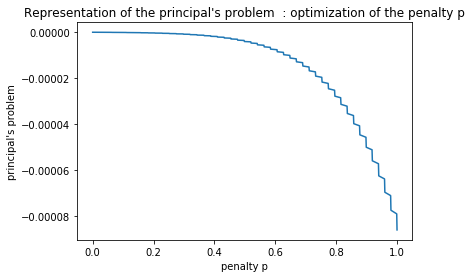

In [245]:
s=0
gA=1
x0=1
taille = 1000
B=1
k=1
function = 5
gP = 10
plt.show()
optip(s,gA,B,x0,k,taille,function,gP)
